# Project: Predicting Video Game Sales 
# Author: Robert Zacchigna

# Table of Contents

* [Problem Statement](#Problem_Statement)
* [Proposal](#Proposal)
* [Dataset - Video Game Sales](#Dataset)
    * [Download Location](#Download_Location)
    * [Columns](#Columns)
* [Imports](#Imports)


* **[Part 1: Exploratory Data Analysis and Data Preprocessing](#Part_1)**
    * [Step 1: Load Dataset](#Part_1-Step_1)
    * [Step 2: Dataset Dimensions and Head](#Part_1-Step_2)
	* [Step 3: Describe the Dataset](#Part_1-Step_3)
	* [Step 4: Numerical Column Histograms](#Part_1-Step_4)
	* [Step 5: Pandas Profiling Report: Summary Information, Correlation Matrices, and Missing Value Information.](#Part_1-Step_5)
    * [Step 6: Further Data Exploration](#Part_1-Step_6)
		* [Proportion of Global Video Game Sales by Genre](#Part_1-Step_6-Vid_Genre)
		* [Top 25 Video Game Sales by Platform and Region](#Part_1-Step_6-Vid_Platform)
		* [Top 10 Video Game Publishers by Global Sales Per Year](#Part_1-Step_6-Vid_Publisher)
	* [Step 7: Annotated Correlation Matrix](#Part_1-Step_7)
        * [Sales](#Part_1-Step_7-Sales)
        * [Genre (Encoded)](#Part_1-Step_7-Genre)
        * [Top 20 (by Sales) Publisher (Encoded)](#Part_1-Step_7-Publisher)
        * [Platform (Encoded)](#Part_1-Step_7-Platform)
	* [Step 8: Drop Unneeded Columns (Rank, Name, Year, Publisher, and Platform)](#Part_1-Step_8)
        * [Final Correlation Matrix](#Part_1-Step_8-Final_Corr_mat)
	* [Step 9: Check for Rows with Missing Values and Remove them if Found](#Part_1-Step_9)
	* [Step 10: Remove Outliers from Dataset](#Part_1-Step_10)
    * [Step 11: Add OneHotEncoded Genre Columns](#Part_1-Step_11)
	* [Step 12: Split Data Into Train and Test Sets](#Part_1-Step_12)
        * [X_Train Structure](#Part_1-Step_12-X_Train)
        * [Y_Train Structure](#Part_1-Step_12-Y_Train)
    * [Part 1 Conclusion](#Part_1-Conclusion)


* **[Part 2: Model Evaluation and Selection](#Part_2)**
    * [Hyperparameter Selection Methodology](#Part_2-Hyper_Param)
    * [Step 1: Create function to calculate Adjusted R squared](#Part_2-Step_1)
    * [Step 2: Conduct Linear Regression Modeling](#Part_2-Step_2)
    * [Step 3: Conduct Random Forest Regression Modeling](#Part_2-Step_3)
    * [Step 4: Conduct K-Nearest Neighbor Regression Modeling](#Part_2-Step_4)
    * [Step 5: Conduct Decision Tree Regression Modeling](#Part_2-Step_5)
    * [Step 6: Adjusted R Squared Values of All Models (From Best to Worst)](#Part_2-Step_6)
    * [Part 2 Conclusion](#Part_2-Conclusion)


* **[Part 3: Best Model Prediction Evaluation and Final Analysis](#Part_3)**
    * [Step 1: Display the best parameters found for the Linear Regression model](#Part_3-Step_1)
    * [Step 2: Conduct modeling of the best Linear Regression model](#Part_3-Step_2)
    * [Step 3: Use the model to predict Video Game Sales using the test ("unseen") data](#Part_3-Step_3)
    * [Part 3 Conclusion - Final Analysis](#Part_3-Conclusion)

<a id='Problem_Statement'></a>
## Problem Statement:

The video game market has only continued to grow over the years and is now spanning all genres. It has continued to grow and expand into a lot of different walks of life, from movies and TV-shows to even books/fan-fiction. With this growing market the various gaming publishers will want to capitalize on the interests of the various gamers within it and picking the right kind of game to develop and put out into the market could make or break a gaming publisher/studio. 

The rise in the market also comes with a rise in gamer expectations for the type of video games they want to play, thus making games has continued to get more expensive as time progressed. This puts further strain on publishers if they develop the wrong game and it flops in the market, it becomes a huge waste of time, money and resources for them. Thus, creating a model based on past successes and failures in the gaming marketplace will help them to decide which type of game to make and where to market it for the best sales results possible. 

<a id='Proposal'></a>
## Proposal:

I will evaluate the performance of multiple different models to determine which one performs the best with the dataset and the models I will be using is: Linear Regression, Random Forest, K-Nearest Neighbor (regression), and Decision Tree. I think it is important to utilize various different type of models so as to not limit the tools available to oneself for analysis. These models will be utilized through the scikit-learn implementations. 

To ensure that the data will not have any data points that would otherwise skew the models in any particular way, i will be removing all records that have data that is more than three standard deviations away from the mean before i start my modeling.

I will determine how the different models perform with the data by splitting the dataset into training and testing sets and using the training set for my initial model analysis. <ins>I will evaluate the performance of each model using the adjusted R squared value, where the closer to 1 the better the model is.</ins> I will be using k fold cross validation to check to see if my models are under or over fitting my data and make changes accordingly.

After determining which model performs the best with the data, I will then use that model to predict the sales of video games using the "unseen" test data to see how it performs. The model prediction performance will also be evaluated using adjusted R squared, where the closer to 1 the better the predictions are.

<a id='Dataset'></a>
## Dataset - Video Games Sales

<ins>Download Location:</ins> https://www.kaggle.com/gregorut/videogamesales <a id='Download_Location'></a>

<ins>Columns:</ins> <a id='Columns'></a>
* __Rank__ - Ranking of overall sales
* __Name__ - The games' name
* __Platform__ - Platform of the games release (i.e. PC,PS4, etc.)
* __Year__ - Year of the game's release
* __Genre__ - Genre of the game
* __Publisher__ - Publisher of the game
* __NA_Sales__ - Sales in North America (in millions)
* __EU_Sales__ - Sales in Europe (in millions)
* __JP_Sales__ - Sales in Japan (in millions)
* __Other_Sales__ - Sales in the rest of the world (in millions)
* __Global_Sales__ - Total worldwide sales.


<a id='Imports'></a>
## Imports

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sb
import pandas_profiling as pp

from notebook import __version__ as nbv

# scipy Libraries
from scipy.stats import norm, stats
from scipy import __version__ as scipv

# matplotlib Libraries
import matplotlib.pyplot as plt
from matplotlib import __version__ as mpv

# plotly Libraries
import plotly.express as ex
from plotly import __version__ as pvm

# sklearn Libraries
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn import __version__ as skv
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Library Versions
print('Library Versions\n' + '='*16 + 
      '\nscipy = %s' % scipv)
print('pandas = %s' % pd.__version__)
print('numpy = %s' % np.__version__)
print('plotly = %s' % pvm)
print('sklearn = %s' % skv)
print('seaborn = %s' % sb.__version__)
print('matplotlib = %s' % mpv)
print('pandas_profiling = %s' % pp.__version__)
print('Jupyter Notebook (notebook) = %s' % nbv)

Library Versions
scipy = 1.6.0
pandas = 1.2.1
numpy = 1.19.5
plotly = 4.14.3
sklearn = 0.23.2
seaborn = 0.11.1
matplotlib = 3.3.4
pandas_profiling = 2.10.0
Jupyter Notebook (notebook) = 6.4.3


<a id='Part_1'></a>
# Part 1: Exploratory Data Analysis and Data Preprocessing

<a id='Part_1-Step_1'></a>
## Step 1: Load Dataset

In [2]:
vgsData = pd.read_csv('Video_Game_Data/Video_Game_Sales.csv')

<a id='Part_1-Step_2'></a>
## Step 2: Dataset Dimensions and Head

In [3]:
print("Dataset Dimensions: {:,} columns and {:,} rows".format(vgsData.shape[1], vgsData.shape[0]))

vgsData.head()

Dataset Dimensions: 11 columns and 16,598 rows


Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

<a id='Part_1-Step_3'></a>
## Step 3: Describe the Dataset

In [4]:
print("Describe Data:")

vgsData.describe()

Describe Data:


Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

<a id='Part_1-Step_4'></a>
## Step 4: Numerical Column Histograms

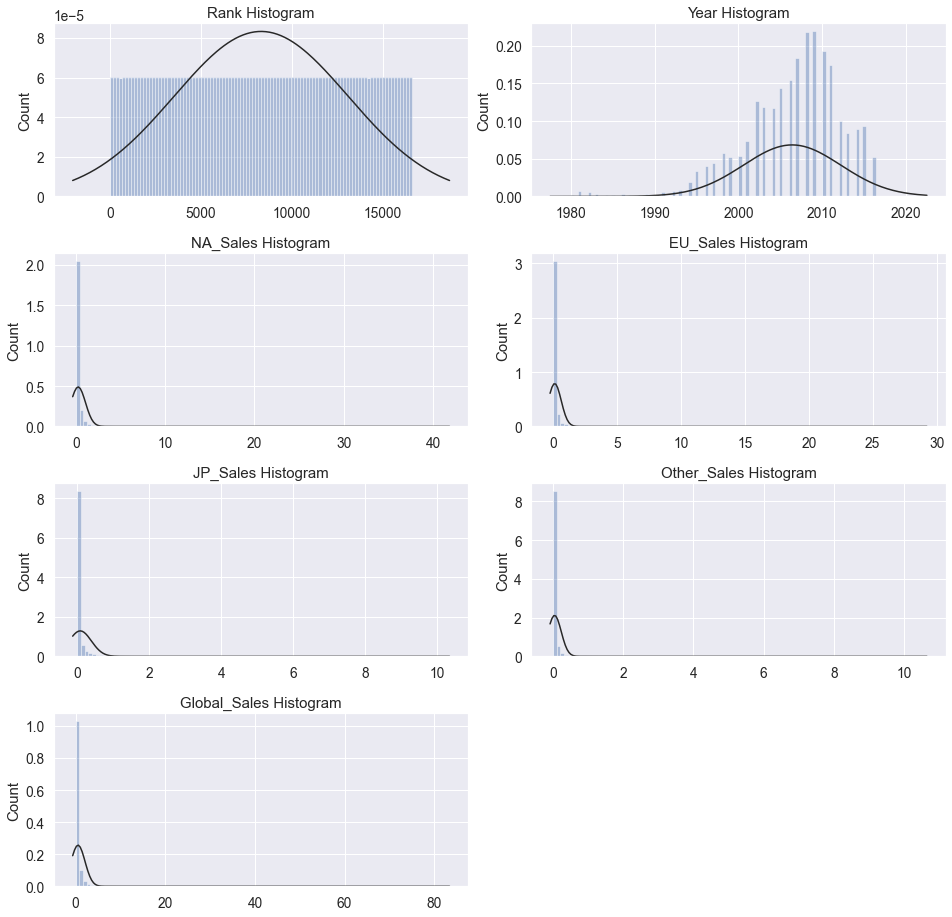

In [5]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.8, wspace=0.5)
fig.set_size_inches(13.5, 13)
sb.set(font_scale = 1.25)

warnings.filterwarnings('ignore')

i = 1
for var in vgsData.columns:
    try:
        fig.add_subplot(4, 2, i)
        sb.distplot(pd.Series(vgsData[var], name=''), bins=100,
                    fit=norm, kde=False).set_title(var + " Histogram")
        plt.ylabel('Count')

        i += 1
    except ValueError:
        pass

fig.tight_layout()
warnings.filterwarnings('default')

<a id='Part_1-Step_5'></a>
## Step 5: Pandas Profiling Report: Summary Information, Correlation Matrices, and Missing Value Information.

In [7]:
# Video Game Sales Profiling Report
pp.ProfileReport(vgsData).to_notebook_iframe()

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<a id='Part_1-Step_6'></a>
## Step 6: Further Data Exploration

<a id='Part_1-Step_6-Vid_Genre'></a>
### Proportion of Global Video Game Sales by Genre

In [6]:
ex.pie(vgsData, names='Genre', title='Proportion of Global Video Game Sales by Genre')

We can see that the "Action" genre is the most popular type of video game by far.

<a id='Part_1-Step_6-Vid_Platform'></a>
### Top 25 Video Game Sales by Platform and Region

Text(0, 0.5, 'Sales (In Millions)')

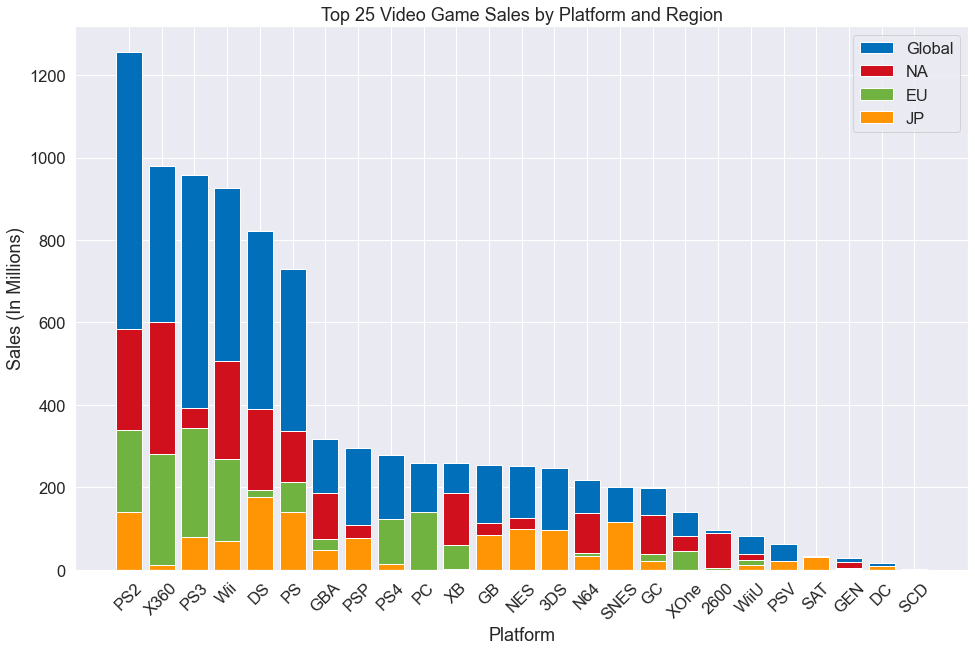

In [7]:
plt.rcParams['figure.figsize'] = (16, 10)
sb.set(font_scale = 1.5)

sales_list = ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales']
vid_plat_reg = vgsData.groupby('Platform')[sales_list].sum().sort_values(by='Global_Sales', ascending=False).reset_index()

color_labels = zip(sales_list, ['#016FB9', '#D1101D', '#71B340', '#FF9505'])

for i, j in color_labels:
    sb.histplot(
        vid_plat_reg[:25],
        x='Platform',
        weights=i,
        multiple='stack',
        edgecolor='white',
        shrink=0.8,
        bins=5,
        label=i.split('_')[0],
        color=j,
        alpha=1
    )

plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.title('Top 25 Video Game Sales by Platform and Region')
plt.ylabel('Sales (In Millions)')

<a id='Part_1-Step_6-Vid_Publisher'></a>
### Top 10 Video Game Publishers by Global Sales Per Year

In [8]:
sales_list = ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales']
top_10_pubs = vgsData.groupby(['Publisher'
                              ])[sales_list].sum().sort_values(by='Global_Sales', 
                                                               ascending=False).reset_index()['Publisher'].unique()[:10]

vid_year_pub = vgsData.groupby(['Year', 'Publisher'])[sales_list].sum().sort_values(by='Global_Sales',
                                                                                    ascending=False).reset_index()
vid_year_pub = vid_year_pub[vid_year_pub['Publisher'].isin(top_10_pubs)]

ex.area(vid_year_pub, x='Year', y="Global_Sales", color="Publisher", 
        title='Top 10 Video Game Publishers by Global Sales Per Year', 
        labels={"Global_Sales": "Sales (In Millions)", "Publisher": 'Publishers'})

We can see that Nintendo has continued to be an industry leader throughout the years.

<a id='Part_1-Step_7'></a>
## Step 7: Annotated Correlation Matrices with OneHotEncoding

<a id='Part_1-Step_7-Sales'></a>
### Sales

Matrix of the Sales columns in the dataset, not encoded

Text(0.5, 1.0, 'Annotated Correlation Matrix of Sales Columns')

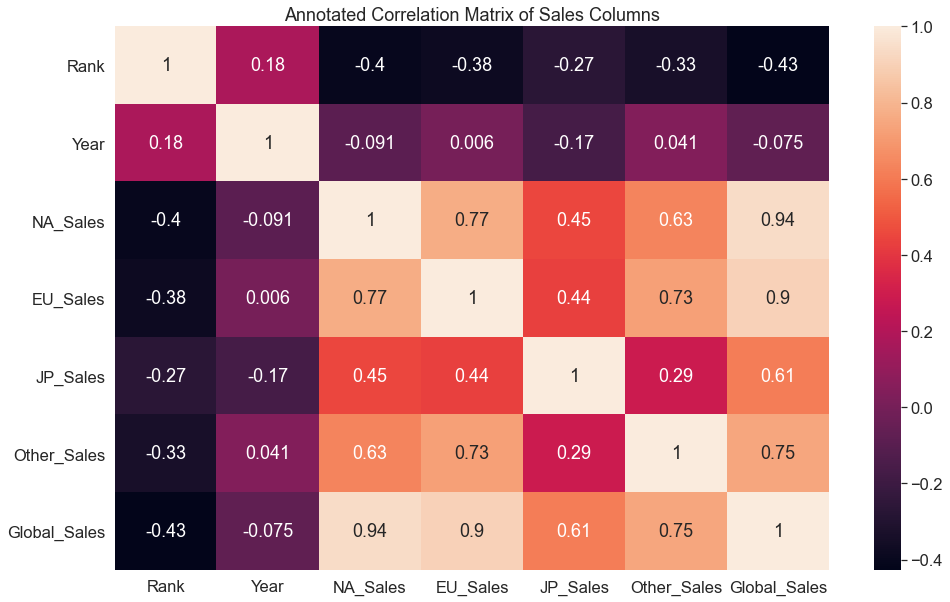

In [9]:
plt.rcParams['figure.figsize'] = (16, 10)

sb.set(font_scale = 1.5)
sb.set_style(style='white')

sb.heatmap(vgsData.corr(), annot=True).set_title('Annotated Correlation Matrix of Sales Columns')

The matrix above makes it clear that both the Rank and Year columns have no significant relationship with any of the sales columns and thus they can be safely dropped from the dataset.

<a id='Part_1-Step_6-Genre'></a>
### Genre (Encoded)

OneHotEncoded Genre column

Text(0.5, 1.0, 'Annotated Correlation Matrix of Encoded Genre Columns')

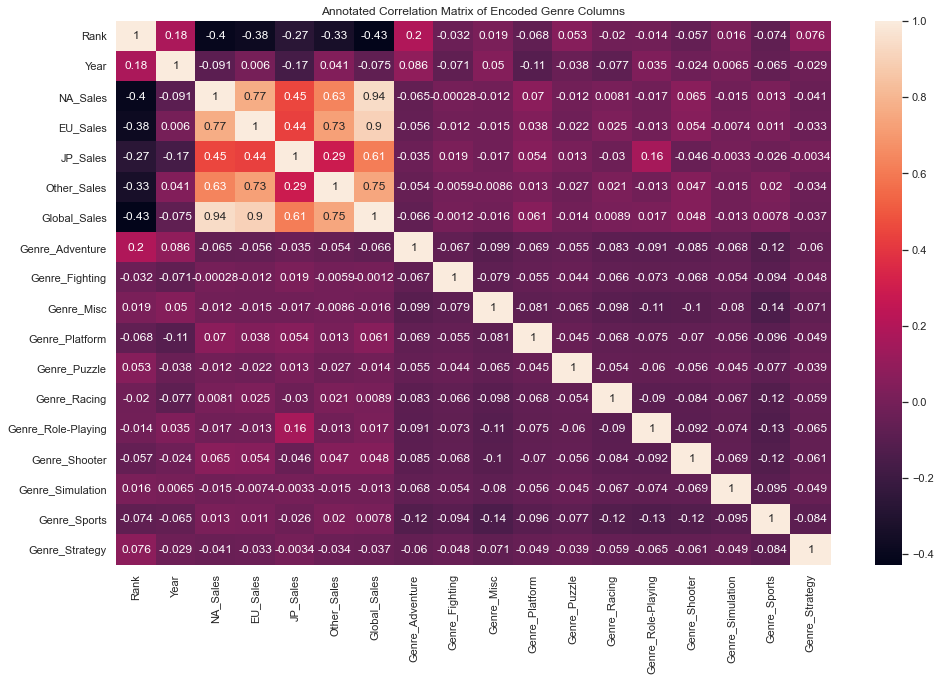

In [10]:
df = pd.get_dummies(vgsData, prefix=['Genre'], columns=['Genre'], drop_first=True)

plt.rcParams['figure.figsize'] = (16, 10)

# sb.set(font_scale = 1.0)
sb.set_style(style='white')

sb.heatmap(df.corr(), annot=True).set_title('Annotated Correlation Matrix of Encoded Genre Columns')

From the matrix above we can see that all genre types have no significant relationships towards the sales columns, with the only exception being JP_sales and Genre_Role-Playing (0.16). 

While the entirety (except for Japan) of the encoded genre columns don't have a lot of significance towards sales, it will be not be dropped from the dataset and be used during the modeling. The main reasoning being we cant have only sales predicting other sales and given the small number of genres, i don't see this consuming too much time to model

<a id='Part_1-Step_6-Publisher'></a>
### Top 20 (by Sales) Publisher (Encoded)

OneHotEncoded of the Top 20 (by Sales) Publishers

Text(0.5, 1.0, 'Annotated Correlation Matrix of Top 20 (by Sales) Encoded Publisher Columns')

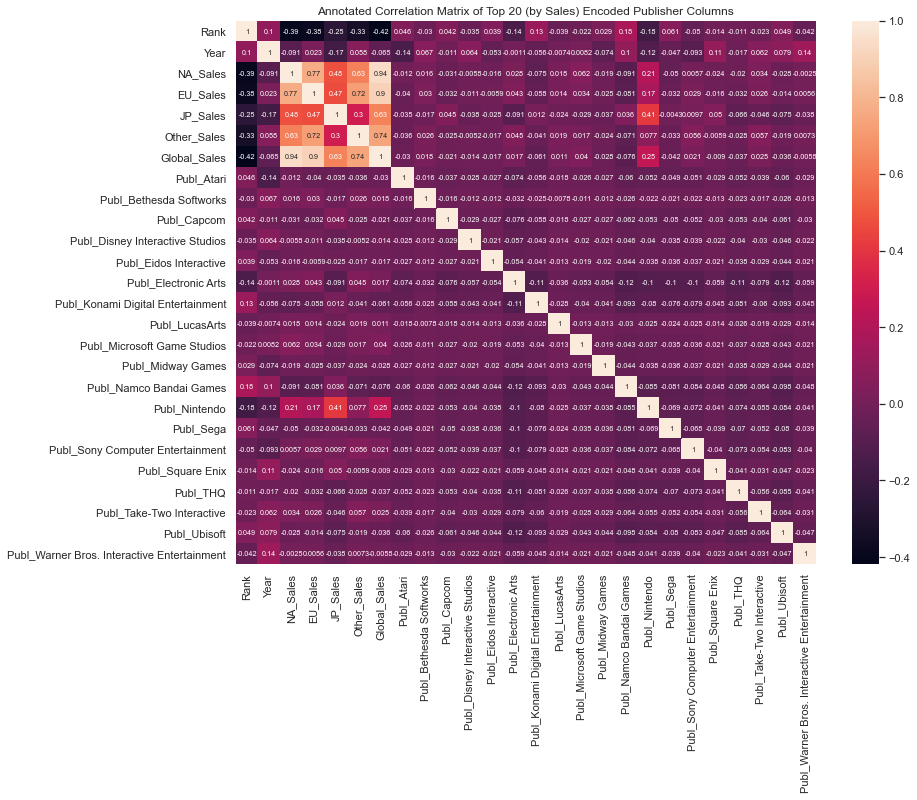

In [11]:
sales_list = ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales']
top_20_pubs = vgsData.groupby(['Publisher'
                              ])[sales_list].sum().sort_values(by='Global_Sales', 
                                                               ascending=False).reset_index()['Publisher'].unique()[:20]

df = pd.get_dummies(vgsData[vgsData['Publisher'].isin(top_20_pubs)], 
                    prefix=['Publ'], columns=['Publisher'], drop_first=True)

plt.rcParams['figure.figsize'] = (13, 10)
plt.rcParams.update({'font.size': 7.2})

# sb.set(font_scale = 1.0)
sb.set_style(style='white')

sb.heatmap(df.corr(), annot=True).set_title('Annotated Correlation Matrix of Top 20 (by Sales) Encoded Publisher Columns')

While a bit hard to read, from the matrix above we can see that nearly all of the top 20 publishers have no significant relationships towards the sales columns, with the only notable exception being Publ_Nintendo across all of the sales columns: NA_Sales (0.21), EU_Sales (0.17), JP_Sales (0.41), and Global_Sales (0.25). 

Since entirety (except for Japan) of the top 20 encoded publisher columns don't have a lot of significance towards sales, it will be dropped from the dataset and not be used during the modeling.

<a id='Part_1-Step_6-Platform'></a>
### Platform (Encoded)

OneHotEncoded Platform Column

Text(0.5, 1.0, 'Annotated Correlation Matrix of Encoded Platform Columns')

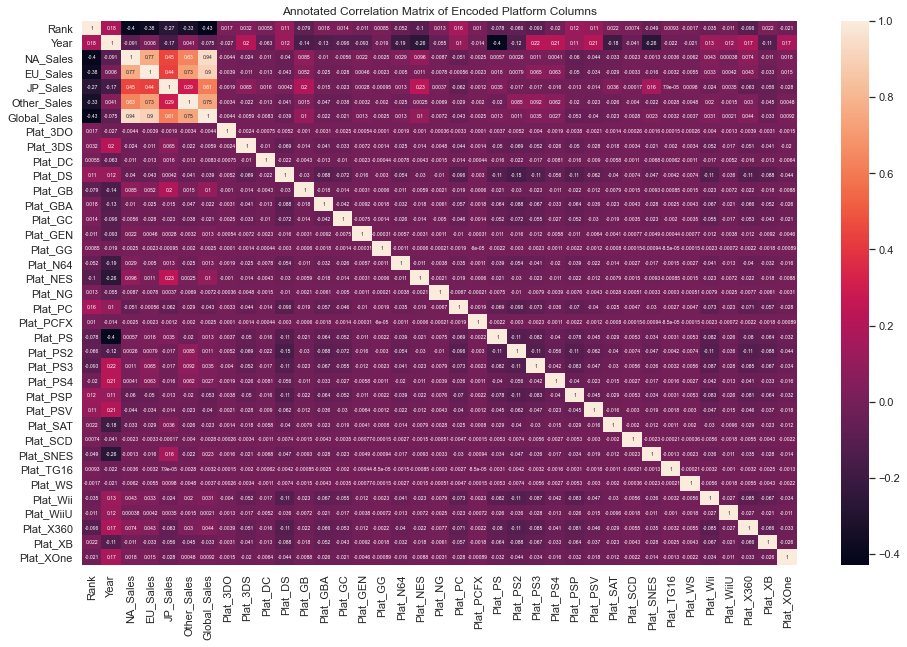

In [12]:
df = pd.get_dummies(vgsData, prefix=['Plat'], columns=['Platform'], drop_first=True)

plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams.update({'font.size': 5})

# sb.set(font_scale = 1.0)
sb.set_style(style='white')

sb.heatmap(df.corr(), annot=True).set_title('Annotated Correlation Matrix of Encoded Platform Columns')

While hard to read, from the matrix above we can see that all platform types have no significant relationships towards the sales columns, with the only exceptions being: JP_sales and Platform_GB (0.2), Platform_NES (0.23) and Platform_SNES (0.18). 

Given that the entirety (except for Japan) of the encoded platform columns have no significance towards sales, it will be dropped from the dataset. There are also just too many columns to be included and it will greatly increase the amount of time it takes to train the various models.

<a id='Part_1-Step_8'></a>
## Step 8: Drop Unneeded Columns (Rank, Name, Year, Publisher, and Platform)

In [3]:
vgsData.drop(['Rank', 'Name', 'Year', 'Publisher', 'Platform'], axis='columns', inplace=True)
vgsData.head()

Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0        Sports     41.49     29.02      3.77         8.46         82.74
1      Platform     29.08      3.58      6.81         0.77         40.24
2        Racing     15.85     12.88      3.79         3.31         35.82
3        Sports     15.75     11.01      3.28         2.96         33.00
4  Role-Playing     11.27      8.89     10.22         1.00         31.37

<a id='Part_1-Step_9'></a>
## Step 9: Check for Rows with Missing Values and Remove them if Found

In [4]:
print('Check for missing values in the dataset: {}'.format(vgsData.isnull().values.any()))

if vgsData.isnull().values.any():
    old_size = len(vgsData)

    vgsData = vgsData.dropna()

    new_size = len(vgsData)

    print('\nNumber of Rows that were Removed: {:,}'.format(old_size - new_size))

Check for missing values in the dataset: False


<a id='Part_1-Step_10'></a>
## Step 10: Remove Outliers from Dataset

In [5]:
before = vgsData.shape[0]
print('Dataset size before outlier removal: {:,}'.format(before))

# Removes all records in the dataset that has data that is more than
# three standard deviations away from the mean of each column
vgsData = vgsData[(np.abs(stats.zscore(vgsData[vgsData.columns[1:]])) < 3).all(axis=1)].reset_index(drop=True)

after = vgsData.shape[0]
print(' Dataset size after outlier removal: {:>6,}\n'.format(after) + '='*43 + 
      '\n\t      Total records removed: {:>6,}'.format(before - after))

Dataset size before outlier removal: 16,598
 Dataset size after outlier removal: 16,124
	      Total records removed:    474


<a id='Part_1-Step_11'></a>
## Step 11: Add OneHotEncoded Genre Columns

In [6]:
vgsData = pd.get_dummies(vgsData, prefix=['Genre'], columns=['Genre'], drop_first=True)
vgsData.head()

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Genre_Adventure  \
0      2.59      1.06      0.80         0.57          5.02                0   
1      2.57      1.57      0.44         0.21          4.79                0   
2      2.60      0.99      0.89         0.13          4.60                0   
3      2.71      1.51      0.03         0.23          4.48                0   
4      2.71      1.29      0.02         0.43          4.45                0   

   Genre_Fighting  Genre_Misc  Genre_Platform  Genre_Puzzle  Genre_Racing  \
0               1           0               0             0             0   
1               0           0               0             0             1   
2               0           0               0             0             0   
3               0           0               0             0             0   
4               0           0               0             0             0   

   Genre_Role-Playing  Genre_Shooter  Genre_Simulation  Genre_Sports  \
0                   0              0                 0             0   
1                   0              0                 0             0   
2                   0              0                 0             0   
3                   0              0                 0             0   
4                   0              0                 0             0   

   Genre_Strategy  
0               0  
1               0  
2               0  
3               0  
4               0

<a id='Part_1-Step_8-Final_Corr_Mat'></a>
### Final Correlation Matrix

Text(0.5, 1.0, 'Final Annotated Correlation Matrix with OneHotEncoded Genre Columns')

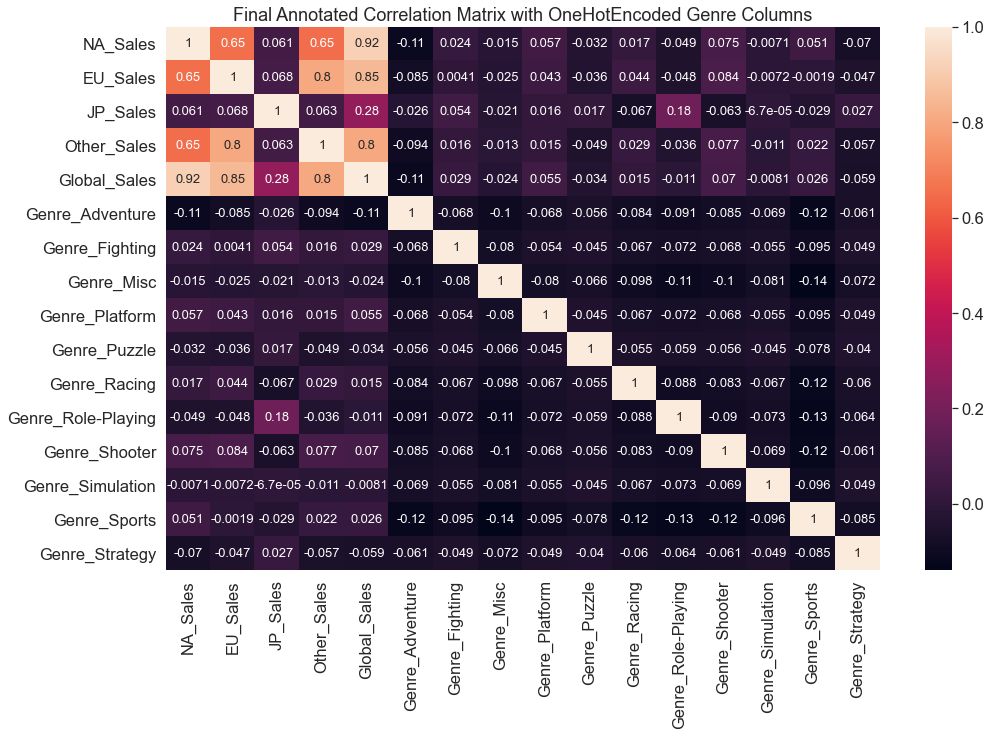

In [12]:
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams.update({'font.size': 13})

# sb.set(font_scale = 1.5)
sb.set_style(style='white')

sb.heatmap(vgsData.corr(), annot=True).set_title('Final Annotated Correlation Matrix with OneHotEncoded Genre Columns')

<a id='Part_1-Step_12'></a>
## Step 12: Split Data Into Train and Test Sets

* <ins>Target Column:</ins>
    * Global_Sales


* <ins>Feature Columns:</ins>
    * NA_Sales 
    * EU_Sales
    * JP_Sales
    * Other_Sales
    * Genre_Adventure
    * Genre_Fighting
    * Genre_Misc
    * Genre_Platform
    * Genre_Puzzle
    * Genre_Racing
    * Genre_Role-Playing
    * Genre_Shooter
    * Genre_Simulation
    * Genre_Sports
    * Genre_Strategy

In [7]:
seed = 74 # Seed for train/test split and Model reproduction

x_train, x_test, y_train, y_test = train_test_split(vgsData[vgsData.columns.drop('Global_Sales')],
                                                    vgsData['Global_Sales'],
                                                    train_size=0.70,
                                                    random_state=seed)

<a id='Part_1-Step_12-X_Train'></a>
### X_Train Structure

In [9]:
print("X_train Dimensions: {:,} columns and {:,} rows".format(x_train.shape[1], x_train.shape[0]))

x_train.head()

X_train Dimensions: 15 columns and 11,286 rows


NA_Sales  EU_Sales  JP_Sales  Other_Sales  Genre_Adventure  \
634        1.61      0.03       0.0         0.08                0   
14139      0.02      0.01       0.0         0.00                0   
5922       0.24      0.00       0.0         0.02                0   
3008       0.53      0.00       0.0         0.04                0   
665        0.90      0.47       0.0         0.32                0   

       Genre_Fighting  Genre_Misc  Genre_Platform  Genre_Puzzle  Genre_Racing  \
634                 0           0               0             0             0   
14139               0           0               0             0             0   
5922                0           0               0             0             0   
3008                0           0               0             0             0   
665                 0           0               0             0             0   

       Genre_Role-Playing  Genre_Shooter  Genre_Simulation  Genre_Sports  \
634                     0              0                 0             1   
14139                   0              0                 0             0   
5922                    0              0                 0             1   
3008                    0              0                 0             1   
665                     0              1                 0             0   

       Genre_Strategy  
634                 0  
14139               0  
5922                0  
3008                0  
665                 0

In [10]:
print("Describe Data: X_train")

x_train.describe()

Describe Data: X_train


NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count  11286.000000  11286.000000  11286.000000  11286.000000   
mean       0.195262      0.100439      0.046889      0.031936   
std        0.341252      0.201328      0.119575      0.063797   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000   
50%        0.070000      0.020000      0.000000      0.010000   
75%        0.220000      0.100000      0.030000      0.030000   
max        2.710000      1.660000      1.000000      0.610000   

       Genre_Adventure  Genre_Fighting    Genre_Misc  Genre_Platform  \
count     11286.000000    11286.000000  11286.000000    11286.000000   
mean          0.079922        0.051480      0.105618        0.052277   
std           0.271184        0.220984      0.307361        0.222595   
min           0.000000        0.000000      0.000000        0.000000   
25%           0.000000        0.000000      0.000000        0.000000   
50%           0.000000        0.000000      0.000000        0.000000   
75%           0.000000        0.000000      0.000000        0.000000   
max           1.000000        1.000000      1.000000        1.000000   

       Genre_Puzzle  Genre_Racing  Genre_Role-Playing  Genre_Shooter  \
count  11286.000000  11286.000000        11286.000000   11286.000000   
mean       0.034999      0.074960            0.089314       0.077441   
std        0.183786      0.263339            0.285209       0.267302   
min        0.000000      0.000000            0.000000       0.000000   
25%        0.000000      0.000000            0.000000       0.000000   
50%        0.000000      0.000000            0.000000       0.000000   
75%        0.000000      0.000000            0.000000       0.000000   
max        1.000000      1.000000            1.000000       1.000000   

       Genre_Simulation  Genre_Sports  Genre_Strategy  
count      11286.000000  11286.000000    11286.000000  
mean           0.053075      0.141148        0.041024  
std            0.224192      0.348190        0.198355  
min            0.000000      0.000000        0.000000  
25%            0.000000      0.000000        0.000000  
50%            0.000000      0.000000        0.000000  
75%            0.000000      0.000000        0.000000  
max            1.000000      1.000000        1.000000

<a id='Part_1-Step_12-Y_Train'></a>
### Y_Train Structure

In [11]:
print("Y_train Dimensions: 1 column and {:,} rows".format(y_train.shape[0]))

y_train.head()

Y_train Dimensions: 1 column and 11,286 rows


634      1.72
14139    0.03
5922     0.27
3008     0.58
665      1.68
Name: Global_Sales, dtype: float64

In [12]:
print("Describe Data: Y_train")

y_train.describe()

Describe Data: Y_train


count    11286.000000
mean         0.374810
std          0.569664
min          0.010000
25%          0.060000
50%          0.160000
75%          0.430000
max          4.790000
Name: Global_Sales, dtype: float64

<a id='Part_1-Conclusion'></a>
## Part 1 Conclusion:

Based on the preprocessing and analysis above, i can see that the data has no missing or duplicated values which would need to be accounted for in the later analysis. There are some strong correlations between several of the variables in the dataset and there also some outlying data points that were found that were removed in order to prevent those data points from skewing analysis results.

<a id='Part_2'></a>
# Part 2: Model Evaluation and Selection

I will be conducting regression modeling on all 4 of the models i outlined in the [Proposal](#Proposal): Linear Regression, Random Forest, K-Nearest Neighbor and Decision Tree.

The adjusted R squared scores of all the models will be compared at the end to determine which model performed the best and thus, the model that did perform the best will be the model that is used to predict future graduate admissions chances.

<a id='Part_2-Hyper_Param'></a>
## Hyperparameter Selection Methodology

For the hyperparameter selection of each model, the methodology i went with for deciding what parameters should be used in each GridSearchCV was to mainly focus on the different types of algorithms available per model and the growth of the model itself (more applicable to Knn, Random Forest and Decision tree). I took a look at the sklearn documentation and looked at all the parameters outlined for each model to it to determine which ones applied to my criteria. I felt that those parameters applicable to each model were the most important in helping to effectively determine the best parameters possible for each model. 

While fine tuning using each and every parameter available for each model would be ideal, i felt that this would take too much time to fine tune them all and might not be the best use of my time because, in my opinion, not all of the parameters available are as important as others (thus, comparatively, not worth the time).

<a id='Part_2-Step_1'></a>
## Step 1: Create function to calculate Adjusted R squared

In [8]:
def adjusted_R_squared(estimator, x, y):
    # estimator.score(x, y) returns the r squared of the model
    return round(1 - (1 - estimator.score(x, y)) * ((x.shape[0] - 1) / (x.shape[0] - x.shape[1] - 1)), 5)

<a id='Part_2-Step_2'></a>
## Step 2: Conduct Linear Regression Modeling

### Create pipeline for scaling and running linear regression on the data

In [9]:
lr_pipe = Pipeline(steps=([
    ('scale', StandardScaler()),
    ('lr', LinearRegression())
]))

### Setup parameters for the linear regression model to be tested by GridSearchCV

In [10]:
param_grid = {'lr__fit_intercept': [True, False],
              'lr__normalize': [True, False]}

lr_grid = GridSearchCV(lr_pipe, refit=True, scoring=adjusted_R_squared, 
                       param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

### Fit the data to the linear regression grid to find the best parameters for the linear regression model

In [11]:
lr_grid.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    3.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.5s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('lr', LinearRegression())]),
             n_jobs=-1,
             param_grid={'lr__fit_intercept': [True, False],
                         'lr__normalize': [True, False]},
             scoring=<function adjusted_R_squared at 0x0000021224319160>,
             verbose=2)

### Display top adjusted R squared scores found by the GridSearchCV

In [12]:
lr_df = pd.DataFrame(lr_grid.cv_results_).sort_values('mean_test_score', 
                                                      ascending=False)[['params', 'mean_test_score']].head(10)
lr_df

params  mean_test_score
0  {'lr__fit_intercept': True, 'lr__normalize': T...         0.999916
1  {'lr__fit_intercept': True, 'lr__normalize': F...         0.999916
2  {'lr__fit_intercept': False, 'lr__normalize': ...         0.562008
3  {'lr__fit_intercept': False, 'lr__normalize': ...         0.562008

### Based off the dataframe above, display the best params and score for the linear regression model

In [13]:
print('Best Linear Regression Parameters\n=================================')

for name, val in lr_df.iloc[0]['params'].items():
    print('{:>19}: {}'.format(name.replace('lr__', ''), val))
    
lr_adjR2 = lr_df.iloc[0]['mean_test_score']
print('\nAjusted R Squared: {}'.format(round(lr_adjR2, 4)))

Best Linear Regression Parameters
      fit_intercept: True
          normalize: True

Ajusted R Squared: 0.9999


<a id='Part_2-Step_3'></a>
## Step 3: Conduct Random Forest Regression Modeling

### Create pipeline for scaling  and running random forest regression on the data

In [14]:
rf_pipe = Pipeline(steps=([
    ('scale', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=seed))
]))

### Setup parameters for the random forest model to be tested by GridSearchCV

In [15]:
param_grid = {'rf__max_depth': np.arange(2, 10, 2),
              'rf__max_features': ['auto', 'sqrt', 'log2'],
              'rf__min_samples_leaf': [1, 2, 4],
              'rf__min_samples_split': [2, 5, 8],
              'rf__n_estimators': np.append(100, np.arange(200, 800, 200))}

rf_grid = GridSearchCV(rf_pipe, refit=True, scoring=adjusted_R_squared, 
                       param_grid = param_grid, cv = 5, n_jobs = -1, verbose=2)

### Fit the data to the random forest grid to find the best parameters for the random forest regression

In [16]:
rf_grid.fit(x_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 12.9min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('rf',
                                        RandomForestRegressor(random_state=74))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': array([2, 4, 6, 8]),
                         'rf__max_features': ['auto', 'sqrt', 'log2'],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 8],
                         'rf__n_estimators': array([100, 200, 400, 600])},
             scoring=<function adjusted_R_squared at 0x0000021224319160>,
             verbose=2)

### Display top adjusted R squared scores found by the GridSearchCV

In [17]:
rf_df = pd.DataFrame(rf_grid.cv_results_).sort_values('mean_test_score',
                                                      ascending=False)[['params', 'mean_test_score']].head(10)
rf_df

params  mean_test_score
327  {'rf__max_depth': 8, 'rf__max_features': 'auto...         0.993140
326  {'rf__max_depth': 8, 'rf__max_features': 'auto...         0.993118
339  {'rf__max_depth': 8, 'rf__max_features': 'auto...         0.993080
331  {'rf__max_depth': 8, 'rf__max_features': 'auto...         0.993048
338  {'rf__max_depth': 8, 'rf__max_features': 'auto...         0.993046
325  {'rf__max_depth': 8, 'rf__max_features': 'auto...         0.993038
343  {'rf__max_depth': 8, 'rf__max_features': 'auto...         0.993034
330  {'rf__max_depth': 8, 'rf__max_features': 'auto...         0.993020
324  {'rf__max_depth': 8, 'rf__max_features': 'auto...         0.993018
342  {'rf__max_depth': 8, 'rf__max_features': 'auto...         0.993002

### Based off the dataframe above, display the best params and score for the random forest model

In [18]:
print('Best Random Forest Regression Parameters\n========================================')

for name, val in rf_df.iloc[0]['params'].items():
    print('{:>24}: {}'.format(name.replace('rf__', ''), val))
    
rf_adjR2 = rf_df.iloc[0]['mean_test_score']
print('\nAjusted R Squared: {}'.format(round(rf_adjR2, 4)))

Best Random Forest Regression Parameters
               max_depth: 8
            max_features: auto
        min_samples_leaf: 1
       min_samples_split: 2
            n_estimators: 600

Ajusted R Squared: 0.9931


<a id='Part_2-Step_4'></a>
## Step 4: Conduct K-Nearest Neighbor Regression Modeling

### Create pipeline for scaling and running knn regression on the data

In [19]:
knn_pipe = Pipeline(steps=([
    ('scale', StandardScaler()),
    ('knn', KNeighborsRegressor())
]))

### Setup parameters for the k-nearest neighbor model to be tested by GridSearchCV

In [20]:
param_grid = {'knn__n_neighbors': np.arange(1, 26, 2),
              'knn__weights': ['uniform'],
              'knn__algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'knn__leaf_size': np.arange(1, 26, 2),
              'knn__p': [1, 2]}

knn_grid = GridSearchCV(knn_pipe, refit=True, scoring=adjusted_R_squared, 
                        param_grid = param_grid, cv = 5, n_jobs = -1, verbose=2)

### Fit the data to the knn grid to find the best parameters for the knn regression

In [21]:
knn_grid.fit(x_train, y_train)

Fitting 5 folds for each of 1014 candidates, totalling 5070 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 5070 out of 5070 | elapsed: 12.5min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'knn__leaf_size': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25]),
                         'knn__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25]),
                         'knn__p': [1, 2], 'knn__weights': ['uniform']},
             scoring=<function adjusted_R_squared at 0x0000021224319160>,
             verbose=2)

### Display top adjusted R squared scores found by the GridSearchCV

In [22]:
knn_df = pd.DataFrame(knn_grid.cv_results_).sort_values('mean_test_score',
                                                        ascending=False)[['params', 'mean_test_score']].head(100)
knn_df

params  mean_test_score
783  {'knn__algorithm': 'brute', 'knn__leaf_size': ...         0.977442
965  {'knn__algorithm': 'brute', 'knn__leaf_size': ...         0.977442
757  {'knn__algorithm': 'brute', 'knn__leaf_size': ...         0.977442
991  {'knn__algorithm': 'brute', 'knn__leaf_size': ...         0.977442
887  {'knn__algorithm': 'brute', 'knn__leaf_size': ...         0.977442
..                                                 ...              ...
340  {'knn__algorithm': 'kd_tree', 'knn__leaf_size'...         0.975116
912  {'knn__algorithm': 'brute', 'knn__leaf_size': ...         0.975116
366  {'knn__algorithm': 'kd_tree', 'knn__leaf_size'...         0.975116
652  {'knn__algorithm': 'kd_tree', 'knn__leaf_size'...         0.975116
574  {'knn__algorithm': 'kd_tree', 'knn__leaf_size'...         0.975116

[100 rows x 2 columns]

### Based off the dataframe above, display the best params and score for the knn model

In [23]:
print('Best Knn Regression Parameters\n==============================')

for name, val in knn_df.iloc[0]['params'].items():
    print('{:>15}: {}'.format(name.replace('knn__', ''), val))
    
knn_adjR2 = knn_df.iloc[0]['mean_test_score']
print('\nAjusted R Squared: {}'.format(round(knn_adjR2, 4)))

Best Knn Regression Parameters
      algorithm: brute
      leaf_size: 9
    n_neighbors: 3
              p: 2
        weights: uniform

Ajusted R Squared: 0.9774


<a id='Part_2-Step_5'></a>
## Step 5: Conduct Decision Tree Regression Modeling

### Create pipeline for scaling and running decision tree regression on the data

In [24]:
dt_pipe = Pipeline(steps=([
    ('scale', StandardScaler()),
    ('dt', DecisionTreeRegressor(random_state=seed))
]))

### Setup parameters for the decision tree model to be tested by GridSearchCV

In [31]:
param_grid = {'dt__criterion': ['mse', 'friedman_mse', 'mae'],
              'dt__splitter': ['best', 'random'],
              'dt__max_features': ['auto', 'sqrt', 'log2'],
              'dt__max_depth': np.arange(1, 12, 2),
              'dt__min_samples_leaf': [1, 2, 4],
              'dt__min_samples_split': [2, 5, 7],
              'dt__ccp_alpha': [0.0, 1.0]}

dt_grid = GridSearchCV(dt_pipe, refit=True, scoring=adjusted_R_squared,
                       param_grid = param_grid, cv = 5, n_jobs = -1, verbose=2)

### Fit the data to the decision tree grid to find the best parameters for the decision tree regression

In [32]:
dt_grid.fit(x_train, y_train)

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 1196 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 2328 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 3437 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 3882 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 4409 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 5272 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 8028 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 8914 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 9720 out of 9720 | elapsed: 21.0min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('dt',
                                        DecisionTreeRegressor(random_state=74))]),
             n_jobs=-1,
             param_grid={'dt__ccp_alpha': [0.0, 1.0],
                         'dt__criterion': ['mse', 'friedman_mse', 'mae'],
                         'dt__max_depth': array([ 1,  3,  5,  7,  9, 11]),
                         'dt__max_features': ['auto', 'sqrt', 'log2'],
                         'dt__min_samples_leaf': [1, 2, 4],
                         'dt__min_samples_split': [2, 5, 7],
                         'dt__splitter': ['best', 'random']},
             scoring=<function adjusted_R_squared at 0x0000021224319160>,
             verbose=2)

### Display top adjusted R squared scores found by the GridSearchCV

In [33]:
dt_df = pd.DataFrame(dt_grid.cv_results_).sort_values('mean_test_score',
                                                      ascending=False)[['params', 'mean_test_score']].head(10)
dt_df

params  mean_test_score
276  {'dt__ccp_alpha': 0.0, 'dt__criterion': 'mse',...         0.987016
600  {'dt__ccp_alpha': 0.0, 'dt__criterion': 'fried...         0.987014
594  {'dt__ccp_alpha': 0.0, 'dt__criterion': 'fried...         0.986786
270  {'dt__ccp_alpha': 0.0, 'dt__criterion': 'mse',...         0.986778
278  {'dt__ccp_alpha': 0.0, 'dt__criterion': 'mse',...         0.986700
602  {'dt__ccp_alpha': 0.0, 'dt__criterion': 'fried...         0.986598
272  {'dt__ccp_alpha': 0.0, 'dt__criterion': 'mse',...         0.986530
596  {'dt__ccp_alpha': 0.0, 'dt__criterion': 'fried...         0.986354
280  {'dt__ccp_alpha': 0.0, 'dt__criterion': 'mse',...         0.985934
604  {'dt__ccp_alpha': 0.0, 'dt__criterion': 'fried...         0.985880

### Based off the dataframe above, display the best params and score for the decision tree model

In [34]:
print('Best Decision Tree Regression Parameters\n========================================')

for name, val in dt_df.iloc[0]['params'].items():
    print('{:>23}: {}'.format(name.replace('dt__', ''), val))
    
dt_adjR2 = dt_df.iloc[0]['mean_test_score']
print('\nAjusted R Squared: {}'.format(round(dt_adjR2, 4)))

Best Decision Tree Regression Parameters
              ccp_alpha: 0.0
              criterion: mse
              max_depth: 11
           max_features: auto
       min_samples_leaf: 2
      min_samples_split: 2
               splitter: best

Ajusted R Squared: 0.987


<a id='Part_2-Step_6'></a>
## Step 6: Adjusted R Squared Values of All Models (From Best to Worst)

In [35]:
adj_R_sqaures = [lr_adjR2, rf_adjR2, knn_adjR2, dt_adjR2]

modelTypes = ['Linear Regression', 'Random Forest', 'K-Nearest Neighbor', 'Decision Tree']

model_r_df = pd.DataFrame(zip(modelTypes, adj_R_sqaures), 
                          columns=['Model Type', 'Adj R Squared'])

model_r_df = model_r_df.nlargest(len(model_r_df), 'Adj R Squared')

model_r_df

Model Type  Adj R Squared
0   Linear Regression       0.999916
1       Random Forest       0.993140
3       Decision Tree       0.987016
2  K-Nearest Neighbor       0.977442

<a id='Part_2-Conclusion'></a>
## Part 2 Conclusion

After performing model analysis on all 4 of my model types and looking at the dataframe of adjusted R squared scores above, the model with the best performance with this data is Linear Regression (with Random Forest coming in a very close second).

<a id='Part_3'></a>
# Part 3: Best Model Prediction Evaluation and Final Analysis

<a id='Part_3-Step_1'></a>
## Step 1: Display the best parameters found for the Linear Regression model

In [41]:
print('Best Linear Regression Parameters\n' + '='*33)

params = {}

for name, val in lr_df.iloc[0]['params'].items():
    name = name.replace('lr__', '')
    
    params.update({name: val})
    print('{:>19}: {}'.format(name, val))
    
print('\nAjusted R Squared: {}'.format(round(lr_df.iloc[0]['mean_test_score'], 4)))

Best Linear Regression Parameters
           fit_intercept: True
               normalize: True

Ajusted R Squared: 0.9999


<a id='Part_3-Step_2'></a>
## Step 2: Conduct modeling of the best Linear Regression model

### Create pipeline for scaling and running the best decision tree regression model

In [39]:
best_pipe = Pipeline(steps=([
    ('scale', StandardScaler()),
    ('lr', LinearRegression(**params))
]))

### Fit the model to all the training data

In [40]:
best_model = best_pipe.fit(x_train, y_train)

best_model

Pipeline(steps=[('scale', StandardScaler()),
                ('lr', LinearRegression(normalize=True))])

<a id='Part_3-Step_3'></a>
## Step 3: Use the model to predict Video Game Sales using the test ("unseen") data

In [42]:
y_pred = best_model.predict(x_test)

### Calculate to the Adjusted R Squared for the experiment and best model (with test data) for comparison

In [44]:
best_model_score = round(1 - (1 - r2_score(y_test, y_pred)) * ((y_test.shape[0] - 1) / (y_test.shape[0] - 1)), 4)

print("Best Linear Regression model score using test data\n" + '='*50 +
      "\nAdjusted R Squared: {}".format(round(best_model_score, 4)))

print('\nDifference between experiment and best model adjusted R squared scores: {}'
      .format(round(best_model_score - lr_adjR2, 4)))

Best Linear Regression model score using test data
Adjusted R Squared: 0.9999

Difference between experiment and best model adjusted R squared scores: -0.0


Since the adjusted R squared value matches what got during my experiments, i am confident the model i have selected will perform well with future, unseen, data.

<a id='Part_3-Conclusion'></a>
## Part 3 Conclusion - Final Analysis

Based on all my analysis and experimentation, i am confident that the final model i have created is the best performing model for utilizing making predictions on future video game sales. I would say that the model could be improved by also utilizing the other columns that needed to be encoded (platform and publisher) but due to the limitations of my current hardware, modeling would simply take too long than would be feasible. 

I would also recommend that using some kind of feature reduction method (PCA, SelectKBest, etc..) could also help in reducing the number of features and the length of modeling time at the cost of a small loss in scoring.